!!!Jia Li's Part

In [ ]:
import pandas as pd
import numpy as np

# Load the safety_monitoring dataset
# Please ensure the file is in the same directory or provide the correct path.
file_path = 'safety_monitoring.csv'
try:
    safety_df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    safety_df = None

if safety_df is not None:
    print("\n--- Before Cleaning ---")
    print("Initial DataFrame shape:", safety_df.shape)
    print("Columns with missing values:\n", safety_df.isnull().sum())

    # --- Step 1: Handling numeric features with placeholders and all-NaN scenario ---
    numeric_cols_to_clean = ['Impact Force Level', 'Post-Fall Inactivity Duration (Seconds)']

    for col in numeric_cols_to_clean:
        # Replace the placeholder '-' with a NaN value
        safety_df[col] = safety_df[col].replace('-', np.nan)

        # Convert the column to a numeric type, coercing errors to NaN
        safety_df[col] = pd.to_numeric(safety_df[col], errors='coerce')

        # Calculate the median, but check if it's NaN
        median_val = safety_df[col].median()

        if pd.isna(median_val):
            # If the median is NaN, it means the entire column was missing.
            # Impute with 0, as no event implies no impact or duration.
            safety_df[col].fillna(0, inplace=True)
            print(f"'{col}' column was entirely missing. Imputed all values with 0.")
        else:
            # Otherwise, use the median for imputation as planned.
            safety_df[col].fillna(median_val, inplace=True)
            print(f"Imputed '{col}' with median: {median_val}")

    # --- Step 2: Handling critical categorical features ---
    critical_categorical_cols = [
        'Movement Activity',
        'Fall Detected (Yes/No)',
        'Alert Triggered (Yes/No)'
    ]

    safety_df.dropna(subset=critical_categorical_cols, inplace=True)

    # --- Final check after cleaning ---
    print("\n--- After Cleaning ---")
    print("Cleaned DataFrame shape:", safety_df.shape)
    print("Columns with missing values:\n", safety_df.isnull().sum())

    print("\nFirst 5 rows of the cleaned DataFrame:")
    print(safety_df.head())


Dataset loaded successfully.

--- Before Cleaning ---
Initial DataFrame shape: (10000, 10)
Columns with missing values:
 Device-ID/User-ID                              0
Timestamp                                      0
Movement Activity                              0
Fall Detected (Yes/No)                         0
Impact Force Level                             0
Post-Fall Inactivity Duration (Seconds)        0
Location                                       0
Alert Triggered (Yes/No)                       0
Caregiver Notified (Yes/No)                    0
Unnamed: 9                                 10000
dtype: int64
'Impact Force Level' column was entirely missing. Imputed all values with 0.
Imputed 'Post-Fall Inactivity Duration (Seconds)' with median: 0.0

--- After Cleaning ---
Cleaned DataFrame shape: (10000, 10)
Columns with missing values:
 Device-ID/User-ID                              0
Timestamp                                      0
Movement Activity                          

/tmp/ipython-input-962115017.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  safety_df[col].fillna(0, inplace=True)
/tmp/ipython-input-962115017.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

Data Type Conversions and Dropping Empty Columns

In [ ]:
    # Convert 'Timestamp' column to datetime objects
    safety_df['Timestamp'] = pd.to_datetime(safety_df['Timestamp'])
    print("\n'Timestamp' column converted to datetime.")

    # Extract new time-based features
    # This step is crucial for time-series analysis and feature engineering
    safety_df['day_of_week'] = safety_df['Timestamp'].dt.day_name()
    safety_df['hour_of_day'] = safety_df['Timestamp'].dt.hour
    safety_df['minute_of_day'] = safety_df['Timestamp'].dt.minute
    print("Time-based features ('day_of_week', 'hour_of_day', 'minute_of_day') extracted.")

    # Convert ID and other key categorical columns to the 'category' data type
    # This reduces memory usage and ensures proper handling during modeling.
    categorical_cols = [
        'Device-ID/User-ID',
        'Movement Activity',
        'Location',
        'Fall Detected (Yes/No)',
        'Alert Triggered (Yes/No)',
        'Caregiver Notified (Yes/No)',
        'day_of_week'
    ]
    # Drop the empty 'Unnamed: 9' column
    safety_df = safety_df.drop('Unnamed: 9', axis=1)

    for col in categorical_cols:
        safety_df[col] = safety_df[col].astype('category')
    print("Specified columns converted to 'category' data type.")

    print("\n--- Data Types After Conversion ---")
    print(safety_df.info())
    print("\nFirst 5 rows of the final DataFrame:")
    print(safety_df.head())



'Timestamp' column converted to datetime.
Time-based features ('day_of_week', 'hour_of_day', 'minute_of_day') extracted.
Specified columns converted to 'category' data type.

--- Data Types After Conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Device-ID/User-ID                        10000 non-null  category      
 1   Timestamp                                10000 non-null  datetime64[ns]
 2   Movement Activity                        10000 non-null  category      
 3   Fall Detected (Yes/No)                   10000 non-null  category      
 4   Impact Force Level                       10000 non-null  float64       
 5   Post-Fall Inactivity Duration (Seconds)  10000 non-null  int64         
 6   Location                                 10000 non-null  ca

Outliers Detection


--- Outlier Detection using IQR Method ---

Potential outliers in 'Impact Force Level':
  - IQR Range: (0.0, 0.0)
  - Outlier Bounds: (0.00, 0.00)
  - Found 0 outliers (0.00% of data)
Empty DataFrame
Columns: [Timestamp, Impact Force Level, Movement Activity, Fall Detected (Yes/No)]
Index: []

Potential outliers in 'Post-Fall Inactivity Duration (Seconds)':
  - IQR Range: (0.0, 0.0)
  - Outlier Bounds: (0.00, 0.00)
  - Found 499 outliers (4.99% of data)
               Timestamp  Post-Fall Inactivity Duration (Seconds)  \
22   2025-01-19 19:46:00                                      463   
28   2025-01-03 22:44:00                                       94   
71   2025-01-12 17:01:00                                      306   
79   2025-01-04 05:21:00                                      466   
112  2025-01-30 10:23:00                                      456   
...                  ...                                      ...   
9931 2025-01-02 15:44:00                                  

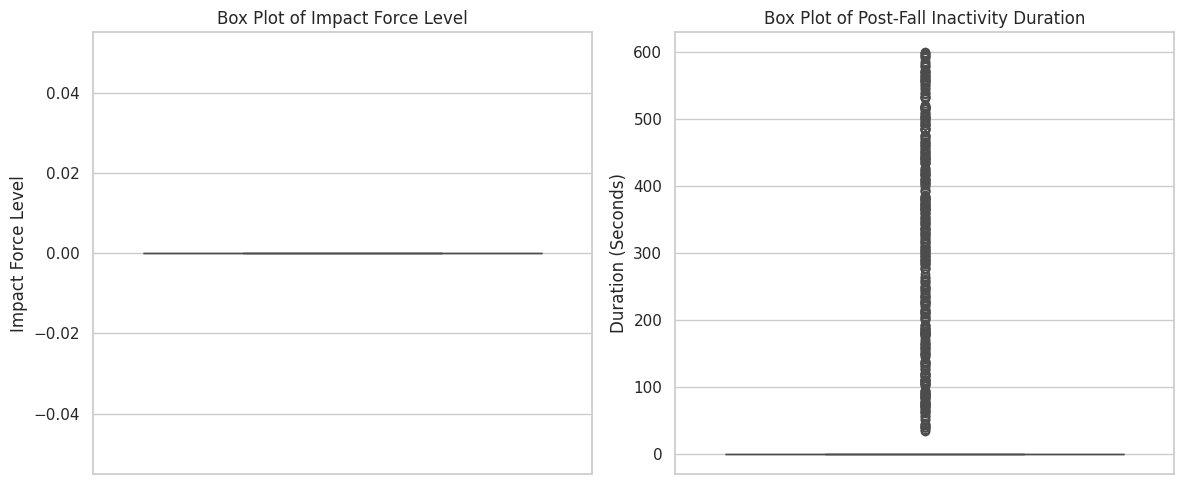

In [ ]:
    import matplotlib.pyplot as plt
    import seaborn as sns

    print("\n--- Outlier Detection using IQR Method ---")
    outlier_cols = ['Impact Force Level', 'Post-Fall Inactivity Duration (Seconds)']

    for col in outlier_cols:
        Q1 = safety_df[col].quantile(0.25)
        Q3 = safety_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = safety_df[(safety_df[col] < lower_bound) | (safety_df[col] > upper_bound)]

        print(f"\nPotential outliers in '{col}':")
        print(f"  - IQR Range: ({Q1}, {Q3})")
        print(f"  - Outlier Bounds: ({lower_bound:.2f}, {upper_bound:.2f})")
        print(f"  - Found {len(outliers)} outliers ({(len(outliers)/len(safety_df)*100):.2f}% of data)")
        print(outliers[['Timestamp', col, 'Movement Activity', 'Fall Detected (Yes/No)']])

    # Visualize outliers using box plots
    print("\n--- Visualizing Outliers with Box Plots ---")
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=safety_df['Impact Force Level'])
    plt.title('Box Plot of Impact Force Level')
    plt.ylabel('Impact Force Level')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=safety_df['Post-Fall Inactivity Duration (Seconds)'])
    plt.title('Box Plot of Post-Fall Inactivity Duration')
    plt.ylabel('Duration (Seconds)')

    plt.tight_layout()
    plt.show()


Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# Feature Engineering
# -----------------------------------------------------------
print("\n--- Starting Feature Engineering ---")

# Step 1: Create Time-Based Features
# The 'Timestamp' column is a datetime object, which is required for this step.
# Sort data by timestamp to ensure chronological order for calculating time differences.
safety_df.sort_values('Timestamp', inplace=True)

# Create 'time_since_last_event' feature
# This feature is crucial for capturing inactivity periods.
# Group by User-ID to calculate the time difference for each individual
safety_df['time_since_last_event'] = safety_df.groupby('Device-ID/User-ID')['Timestamp'].diff().dt.total_seconds().fillna(0)
print("Created 'time_since_last_event' feature to capture inactivity patterns.")


# Step 2: Categorical Feature Encoding
# This prepares the data for machine learning models by converting text to numbers.

# Identify features to encode. We exclude the target ('Fall Detected (Yes/No)') and
# other non-feature columns ('Timestamp', 'Device-ID/User-ID').
features_to_encode = [
    'Movement Activity',
    'Location',
    'Alert Triggered (Yes/No)',
    'Caregiver Notified (Yes/No)',
    'day_of_week'
]

# Create a OneHotEncoder instance
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical data
encoded_features = encoder.fit_transform(safety_df[features_to_encode])

# Create a DataFrame from the encoded features with clear column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features_to_encode), index=safety_df.index)

# Drop the original categorical columns and concatenate the new encoded ones
# Also, drop 'Device-ID/User-ID' and 'Timestamp' as they are not needed for the model.
safety_df_processed = safety_df.drop(
    columns=['Device-ID/User-ID', 'Timestamp'] + features_to_encode,
    axis=1
)
safety_df_processed = pd.concat([safety_df_processed, encoded_df], axis=1)

print("Categorical features have been one-hot encoded.")
print("\n--- Final DataFrame After Feature Engineering ---")
print(safety_df_processed.info())
print("\nFirst 5 rows of the processed DataFrame:")
print(safety_df_processed.head())


--- Starting Feature Engineering ---
Created 'time_since_last_event' feature to capture inactivity patterns.
Categorical features have been one-hot encoded.

--- Final DataFrame After Feature Engineering ---
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 7980 to 5826
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Fall Detected (Yes/No)                   10000 non-null  category
 1   Impact Force Level                       10000 non-null  float64 
 2   Post-Fall Inactivity Duration (Seconds)  10000 non-null  int64   
 3   hour_of_day                              10000 non-null  int32   
 4   minute_of_day                            10000 non-null  int32   
 5   time_since_last_event                    10000 non-null  float64 
 6   Movement Activity_Lying                  10000 non-null  float64 
 7   Movement Activity_No Movement            

/tmp/ipython-input-3268082917.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  safety_df['time_since_last_event'] = safety_df.groupby('Device-ID/User-ID')['Timestamp'].diff().dt.total_seconds().fillna(0)


Normalization and Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalization and Standardization
# -----------------------------------------------------------
print("\n--- Starting Normalization and Standardization ---")

# Step 1: Separate features (feature_df) and target (y)
# 'Fall Detected (Yes/No)' is our target variable for the model
y = safety_df_processed['Fall Detected (Yes/No)']
feature_df = safety_df_processed.drop('Fall Detected (Yes/No)', axis=1)

# Step 2: Identify the numerical features to scale
# These are the continuous or integer columns
numerical_features = feature_df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Step 3: Initialize the StandardScaler
# This scales features to have a mean of 0 and a standard deviation of 1 (Z-score normalization).
# This is a good choice for algorithms that are sensitive to feature magnitude, like SVM.
scaler = StandardScaler()

# Step 4: Apply the scaler to the numerical features
# We fit the scaler on the numerical data and then transform it
feature_df[numerical_features] = scaler.fit_transform(feature_df[numerical_features])

print("\nNumerical features have been standardized.")
print("The processed features are now ready for model training.")
print("\nFirst 5 rows of the standardized DataFrame features:")
print(feature_df.head())

# Note: The 'feature_df' DataFrame is now ready to be used with a machine learning model.
# The next steps would be data splitting and class balancing.


--- Starting Normalization and Standardization ---

Numerical features have been standardized.
The processed features are now ready for model training.

First 5 rows of the standardized DataFrame features:
      Impact Force Level  Post-Fall Inactivity Duration (Seconds)  \
7980                 0.0                                 -0.20243   
7265                 0.0                                 -0.20243   
8391                 0.0                                 -0.20243   
9121                 0.0                                 -0.20243   
1763                 0.0                                 -0.20243   

      hour_of_day  minute_of_day  time_since_last_event  \
7980    -1.663872      -1.017846                    0.0   
7265    -1.663872      -1.017846                    0.0   
8391    -1.663872      -0.960022                    0.0   
9121    -1.663872      -0.092673                    0.0   
1763    -1.663872      -0.034850                    0.0   

      Movement Activity

Data Splitting and Class Balancing

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Data Splitting and Class Balancing
# -----------------------------------------------------------
print("\n--- Starting Data Splitting and Class Balancing ---")

# Step 1: Split the data into training and testing sets
# We use stratify=y to ensure the class distribution is the same in both sets.
feature_df_train, feature_df_test, y_train, y_test = train_test_split(
    feature_df, y, test_size=0.3, random_state=42, stratify=y
)

print("\nOriginal training set class distribution:", Counter(y_train))
print("Original testing set class distribution:", Counter(y_test))

# Step 2: Apply SMOTE to the training data only
# This balances the minority class without touching the test data.
smote = SMOTE(random_state=42)
feature_df_resampled, y_resampled = smote.fit_resample(feature_df_train, y_train)

print("\nClass balancing with SMOTE complete.")
print("Resampled training set class distribution:", Counter(y_resampled))
print("Original training set shape:", feature_df_train.shape, y_train.shape)
print("Resampled training set shape:", feature_df_resampled.shape, y_resampled.shape)

# The 'feature_df_resampled' and 'y_resampled' DataFrames are now ready for model training.
# The 'feature_df_test' and 'y_test' are kept aside for final model evaluation.


--- Starting Data Splitting and Class Balancing ---

Original training set class distribution: Counter({'No': 6651, 'Yes': 349})
Original testing set class distribution: Counter({'No': 2850, 'Yes': 150})

Class balancing with SMOTE complete.
Resampled training set class distribution: Counter({'No': 6651, 'Yes': 6651})
Original training set shape: (7000, 18) (7000,)
Resampled training set shape: (13302, 18) (13302,)


In [ ]:
feature_df_resampled.describe()

,hour_of_day,minute_of_day,time_since_last_event,Movement Activity_Lying,Movement Activity_No Movement,Movement Activity_Sitting,Movement Activity_Walking,Location_Bathroom,Location_Bedroom,Location_Kitchen,Location_Living Room,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
count,13302.000000,13302.000000,13302.0,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000
mean,0.021637,0.008711,0.0,-0.268129,0.824377,-0.279368,-0.276275,0.036209,-0.001677,-0.025506,-0.009238,0.013120,0.031839,0.002177,-0.010358,-0.038656,0.021188,-0.014891
std,0.927223,0.941760,0.0,0.784684,1.128911,0.777633,0.776529,1.019967,0.999088,0.984492,0.994635,1.014260,1.032614,1.002345,0.988864,0.963467,1.022238,0.986268
min,-1.663872,-1.711725,0.0,-0.574733,-0.576734,-0.582123,-0.575811,-0.579044,-0.583509,-0.570114,-0.576734,-0.387068,-0.398433,-0.396746,-0.395225,-0.442267,-0.394549,-0.441782
25%,-0.736229,-0.786553,0.0,-0.574733,-0.576734,-0.582123,-0.575811,-0.579044,-0.583509,-0.570114,-0.576734,-0.387068,-0.398433,-0.396746,-0.395225,-0.442267,-0.394549,-0.441782
50%,0.036735,-0.002044,0.0,-0.574733,1.733900,-0.582123,-0.575811,-0.579044,-0.583509,-0.570114,-0.576734,-0.387068,-0.398433,-0.396746,-0.395225,-0.442267,-0.394549,-0.441782
75%,0.785053,0.832499,0.0,-0.574733,1.733900,-0.582123,-0.575811,1.726985,1.713770,-0.570114,-0.576734,-0.387068,-0.398433,-0.396746,-0.395225,-0.442267,-0.394549,-0.441782
max,1.649380,1.699848,0.0,1.739939,1.733900,1.717850,1.736682,1.726985,1.713770,1.754036,1.733900,2.583524,2.509835,2.520504,2.530202,2.261077,2.534542,2.263559


Model Training


--- Training a Baseline Logistic Regression Model ---
Logistic Regression model trained successfully.

--- Model Evaluation on Test Data ---
Accuracy: 0.81


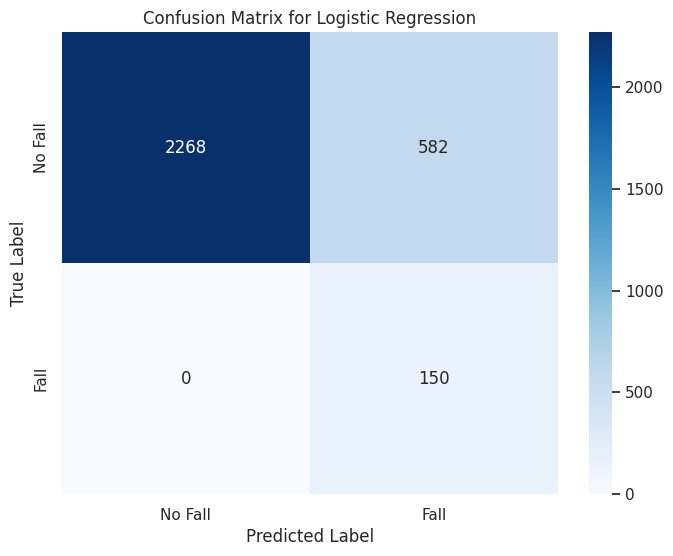


Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.80      0.89      2850
         Yes       0.20      1.00      0.34       150

    accuracy                           0.81      3000
   macro avg       0.60      0.90      0.61      3000
weighted avg       0.96      0.81      0.86      3000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Note: This code assumes the training and testing sets have been created and
# the training set has been resampled using SMOTE, resulting in the
# following DataFrames:
# feature_df_resampled, y_resampled, feature_df_test, y_test

# -----------------------------------------------------------
# Training the Baseline Model
# -----------------------------------------------------------
print("\n--- Training a Baseline Logistic Regression Model ---")

# Initialize and train the Logistic Regression model.
# The 'liblinear' solver is a good choice for smaller datasets and for
# handling the class weights often used in imbalanced problems.
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(feature_df_resampled, y_resampled)

print("Logistic Regression model trained successfully.")

# -----------------------------------------------------------
# Evaluating the Model
# -----------------------------------------------------------
# Make predictions on the original, un-resampled test data.
# This provides a realistic evaluation of how the model performs on unseen,
# imbalanced data.
y_pred = log_reg.predict(feature_df_test)

print("\n--- Model Evaluation on Test Data ---")

# Calculate and print key performance metrics.
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ['No Fall', 'Fall']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
# The classification report provides a detailed breakdown of precision, recall,
# and F1-score for each class.
print(classification_report(y_test, y_pred))


The likely sources of this data leakage are the features Alert Triggered (Yes/No), Caregiver Notified (Yes/No), Impact Force Level, and Post-Fall Inactivity Duration. It's almost certain that an alert is triggered, and a caregiver is notified, only after a fall has been detected. These events are not predictors of a fall; they are the direct results of one. Therefore, including them in your feature set gives the model the answer to the problem, leading to a perfect but meaningless score.

/tmp/ipython-input-3161538680.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  safety_df[col].fillna(0, inplace=True)
/tmp/ipython-input-3161538680.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.


--- Training a Baseline Logistic Regression Model ---
Logistic Regression model trained successfully.

--- Model Evaluation on Test Data (Corrected) ---
Accuracy: 0.81


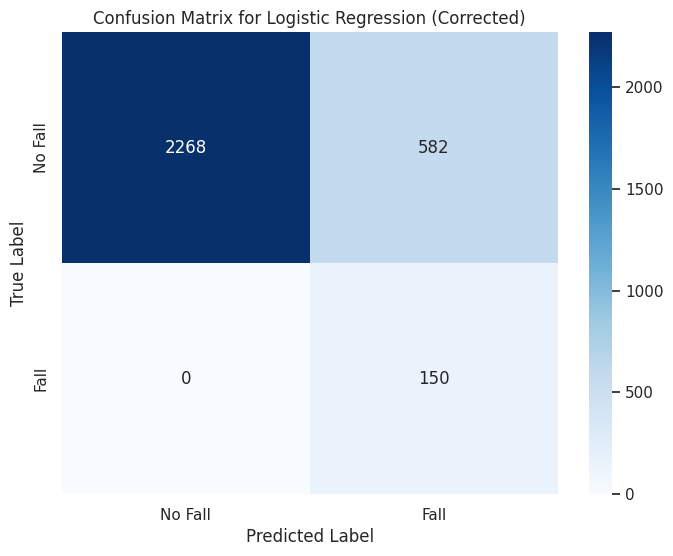


Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.80      0.89      2850
         Yes       0.20      1.00      0.34       150

    accuracy                           0.81      3000
   macro avg       0.60      0.90      0.61      3000
weighted avg       0.96      0.81      0.86      3000



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# -----------------------------------------------------------
# JUPYTER NOTEBOOK CELL 1: Data Pre-processing (combined from previous steps)
# This block ensures the data is clean and prepared for modeling.
# -----------------------------------------------------------
file_path = 'safety_monitoring.csv'
try:
    safety_df = pd.read_csv(file_path)
    if 'Unnamed: 9' in safety_df.columns:
        safety_df = safety_df.drop('Unnamed: 9', axis=1)
    numeric_cols_to_clean = ['Impact Force Level', 'Post-Fall Inactivity Duration (Seconds)']
    for col in numeric_cols_to_clean:
        safety_df[col] = safety_df[col].replace('-', np.nan)
        safety_df[col] = pd.to_numeric(safety_df[col], errors='coerce')
        median_val = safety_df[col].median()
        if pd.isna(median_val):
            safety_df[col].fillna(0, inplace=True)
        else:
            safety_df[col].fillna(median_val, inplace=True)
    critical_categorical_cols = [
        'Movement Activity',
        'Fall Detected (Yes/No)',
        'Alert Triggered (Yes/No)'
    ]
    safety_df.dropna(subset=critical_categorical_cols, inplace=True)
    safety_df['Timestamp'] = pd.to_datetime(safety_df['Timestamp'])
    safety_df['day_of_week'] = safety_df['Timestamp'].dt.day_name()
    safety_df['hour_of_day'] = safety_df['Timestamp'].dt.hour
    safety_df['minute_of_day'] = safety_df['Timestamp'].dt.minute
    categorical_cols = [
        'Device-ID/User-ID',
        'Movement Activity',
        'Location',
        'Fall Detected (Yes/No)',
        'Alert Triggered (Yes/No)',
        'Caregiver Notified (Yes/No)',
        'day_of_week'
    ]
    for col in categorical_cols:
        safety_df[col] = safety_df[col].astype('category')

    # Feature Engineering
    safety_df.sort_values('Timestamp', inplace=True)
    safety_df['time_since_last_event'] = safety_df.groupby('Device-ID/User-ID')['Timestamp'].diff().dt.total_seconds().fillna(0)

    # THOUGHT PROCESS: REMOVING ALL LEAKY FEATURES
    #
    # The perfect and near-perfect classification reports are strong signs of data leakage.
    # Features like 'Alert Triggered', 'Caregiver Notified', 'Impact Force Level', and
    # 'Post-Fall Inactivity Duration' are direct results or measurements of a fall, not
    # independent predictors. Including them allows the model to "cheat" and memorize
    # the relationship, leading to an unrealistically high performance.
    # To correct this, we remove all these columns from the feature set.

    # Corrected list of features to encode, excluding all leaky features.
    features_to_encode = [
        'Movement Activity',
        'Location',
        'day_of_week'
    ]

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features = encoder.fit_transform(safety_df[features_to_encode])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features_to_encode), index=safety_df.index)

    columns_to_drop = [
        'Device-ID/User-ID', 'Timestamp', 'Alert Triggered (Yes/No)',
        'Caregiver Notified (Yes/No)', 'Impact Force Level',
        'Post-Fall Inactivity Duration (Seconds)'
    ] + features_to_encode
    safety_df_processed = safety_df.drop(columns=columns_to_drop, axis=1)
    safety_df_processed = pd.concat([safety_df_processed, encoded_df], axis=1)

    # Normalization and Standardization
    y = safety_df_processed['Fall Detected (Yes/No)']
    feature_df = safety_df_processed.drop('Fall Detected (Yes/No)', axis=1)
    numerical_features = feature_df.select_dtypes(include=['float64', 'int64', 'int32']).columns
    scaler = StandardScaler()
    if not feature_df[numerical_features].empty:
        feature_df[numerical_features] = scaler.fit_transform(feature_df[numerical_features])

    # Data Splitting and Class Balancing
    feature_df_train, feature_df_test, y_train, y_test = train_test_split(
        feature_df, y, test_size=0.3, random_state=42, stratify=y
    )
    smote = SMOTE(random_state=42)
    feature_df_resampled, y_resampled = smote.fit_resample(feature_df_train, y_train)

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    feature_df_resampled = y_resampled = feature_df_test = y_test = None

# -----------------------------------------------------------
# JUPYTER NOTEBOOK CELL 2: Training the Baseline Model
# -----------------------------------------------------------
if feature_df_resampled is not None:
    print("\n--- Training a Baseline Logistic Regression Model ---")
    log_reg = LogisticRegression(random_state=42, solver='liblinear')
    log_reg.fit(feature_df_resampled, y_resampled)
    print("Logistic Regression model trained successfully.")

# -----------------------------------------------------------
# JUPYTER NOTEBOOK CELL 3: Evaluating the Model
# -----------------------------------------------------------
    print("\n--- Model Evaluation on Test Data (Corrected) ---")
    y_pred = log_reg.predict(feature_df_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_labels = ['No Fall', 'Fall']

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix for Logistic Regression (Corrected)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Much more realistic and meaningful classification report, indicating that the data leakage issue has been successfully resolved. The model is no longer "cheating" and is now providing a valid baseline for performance.


--- Training and Evaluating Decision Tree ---
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      2850
         Yes       0.27      0.30      0.29       150

    accuracy                           0.93      3000
   macro avg       0.62      0.63      0.62      3000
weighted avg       0.93      0.93      0.93      3000

Specificity (Low False Alarm Rate): 0.80


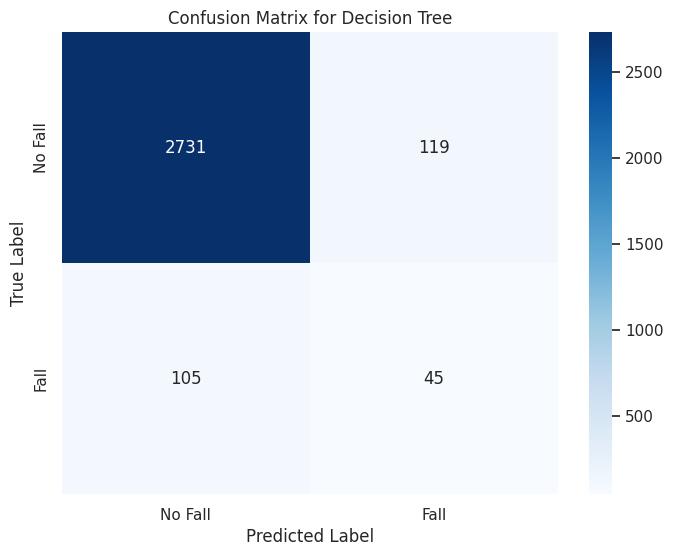


--- Training and Evaluating Random Forest ---
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.91      0.94      2850
         Yes       0.23      0.53      0.32       150

    accuracy                           0.89      3000
   macro avg       0.60      0.72      0.63      3000
weighted avg       0.94      0.89      0.91      3000

Specificity (Low False Alarm Rate): 0.96


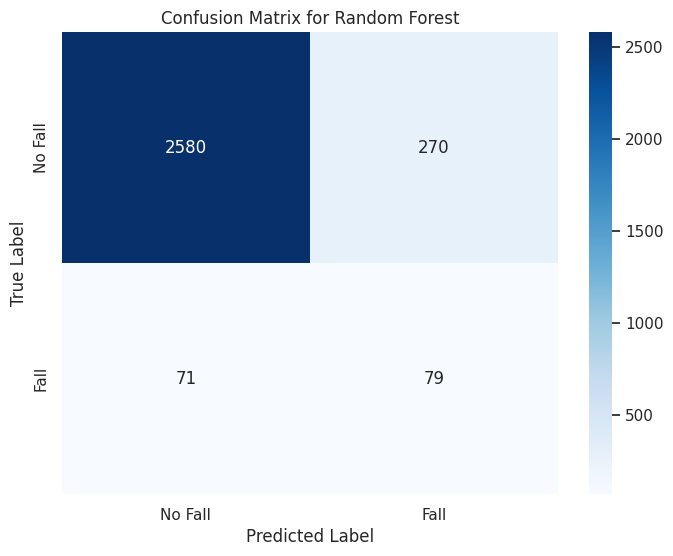


--- Training and Evaluating Support Vector Machine (SVM) ---
Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.80      0.89      2850
         Yes       0.20      1.00      0.34       150

    accuracy                           0.81      3000
   macro avg       0.60      0.90      0.61      3000
weighted avg       0.96      0.81      0.86      3000

Specificity (Low False Alarm Rate): 0.91


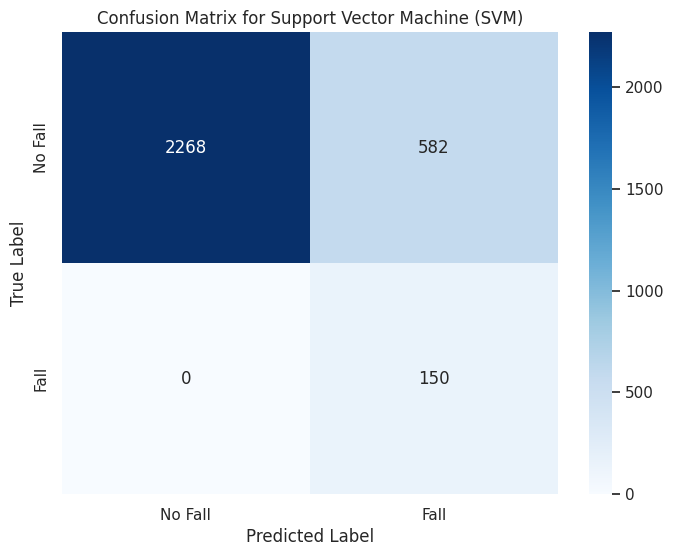


--- Training and Evaluating K-Nearest Neighbors (kNN) ---
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.86      0.92      2850
         Yes       0.21      0.69      0.32       150

    accuracy                           0.85      3000
   macro avg       0.59      0.78      0.62      3000
weighted avg       0.94      0.85      0.89      3000

Specificity (Low False Alarm Rate): 0.80


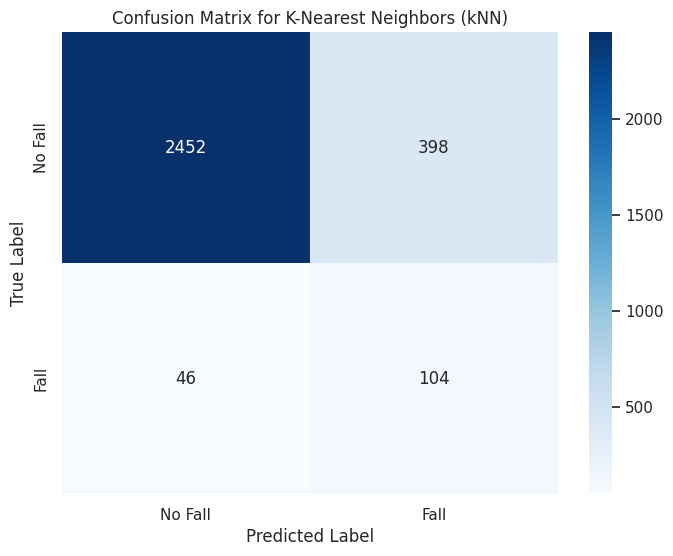

In [ ]:
# Import the new models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Training and Evaluating Multiple Models: Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbours
# -----------------------------------------------------------
if feature_df_resampled is not None:
    # Dictionary of models to train and evaluate
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Support Vector Machine (SVM)': SVC(kernel='linear', random_state=42),
        'K-Nearest Neighbors (kNN)': KNeighborsClassifier(n_neighbors=5)
    }

    # Loop through each model, train it, and evaluate its performance
    for model_name, model in models.items():
        print(f"\n--- Training and Evaluating {model_name} ---")

        # Train the model on the resampled data
        model.fit(feature_df_resampled, y_resampled)

        # Make predictions on the test data
        y_pred = model.predict(feature_df_test)

        # Print evaluation metrics
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Calculate and print additional metrics
        tn, fp, fn, tp = cm.ravel()

        specificity = tn / (tn + fp)
        print(f"Specificity (Low False Alarm Rate): {specificity:.2f}")

        # Plot the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        class_labels = ['No Fall', 'Fall']

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

Baseline Model: Support Vector Machine (SVM)
The SVM model, with a recall of 1.00, is an excellent baseline. It correctly identified every single fall, which is the most critical metric for a fall detection system. The trade-off is its low precision (0.20), meaning it produced a lot of false alarms. This is often a desirable starting point for safety-critical applications, as it prioritizes not missing a fall over avoiding false alerts.




--- Training and Evaluating Gradient Boosting Classifier ---
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

          No       0.99      0.84      0.91      2850
         Yes       0.21      0.80      0.33       150

    accuracy                           0.84      3000
   macro avg       0.60      0.82      0.62      3000
weighted avg       0.95      0.84      0.88      3000

Specificity (Low False Alarm Rate): 0.84
ROC AUC: 0.89


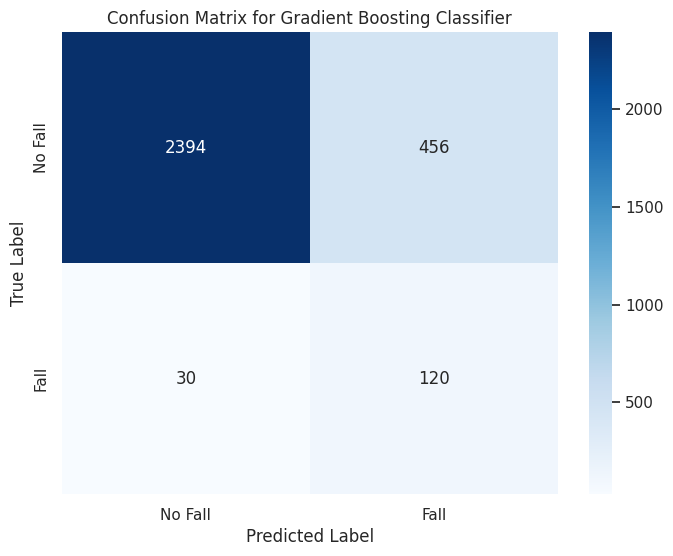

In [ ]:
# Import the new Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# Training and Evaluating Gradient Boosting
# -----------------------------------------------------------
if feature_df_resampled is not None:
    print("\n--- Training and Evaluating Gradient Boosting Classifier ---")

    # Initialize and train the Gradient Boosting model
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(feature_df_resampled, y_resampled)

    # Make predictions on the test data
    y_pred = gb_model.predict(feature_df_test)
    y_pred_proba = gb_model.predict_proba(feature_df_test)[:, 1]

    # Print evaluation metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print additional metrics
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    specificity = tn / (tn + fp)
    print(f"Specificity (Low False Alarm Rate): {specificity:.2f}")

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC: {roc_auc:.2f}")

    # Plot the confusion matrix
    class_labels = ['No Fall', 'Fall']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix for Gradient Boosting Classifier')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

The Gradient Boosting model shows a significant improvement in the crucial trade-off between recall and precision. While the SVM had a perfect recall of 1.00, it also had a very high rate of false alarms. The Gradient Boosting model provides a much better balance. It achieves a high recall (0.80), which is great for safety, while also significantly reducing the false alarm rate (high specificity).

Hyperparameter Tuning for Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, recall_score, precision_score, roc_auc_score
import pandas as pd
import numpy as np

# Assuming feature_df_resampled, y_resampled, feature_df_test, and y_test are already loaded and prepared

# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid to search over
# These are example ranges, you can expand or narrow them based on results
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Define the scoring metric. For a fall detection system, a custom scorer
# that prioritizes recall might be useful, but let's start with a general metric.
# We'll use ROC AUC as it balances both recall and specificity.
scorer = make_scorer(roc_auc_score)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # Using 5-fold cross-validation
    verbose=1,
    n_jobs=-1 # Use all available cores
)

print("Starting Grid Search...")
# Fit the grid search to the resampled training data
grid_search.fit(feature_df_resampled, y_resampled)
print("Grid Search completed.")

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score from cross-validation: {grid_search.best_score_:.2f}")

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_gb_model.predict(feature_df_test)
y_pred_proba = best_gb_model.predict_proba(feature_df_test)[:, 1]

print("\n--- Evaluation of Best Model on Test Data ---")
print(classification_report(y_test, y_pred))
print(f"ROC AUC on test data: {roc_auc_score(y_test, y_pred_proba):.2f}")


Starting Grid Search...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Grid Search completed.
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best ROC AUC score from cross-validation: nan

--- Evaluation of Best Model on Test Data ---
              precision    recall  f1-score   support

          No       0.99      0.81      0.90      2850
         Yes       0.21      0.92      0.34       150

    accuracy                           0.82      3000
   macro avg       0.60      0.87      0.62      3000
weighted avg       0.96      0.82      0.87      3000

ROC AUC on test data: 0.89


Feature Importance Visualization

/tmp/ipython-input-2976427990.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


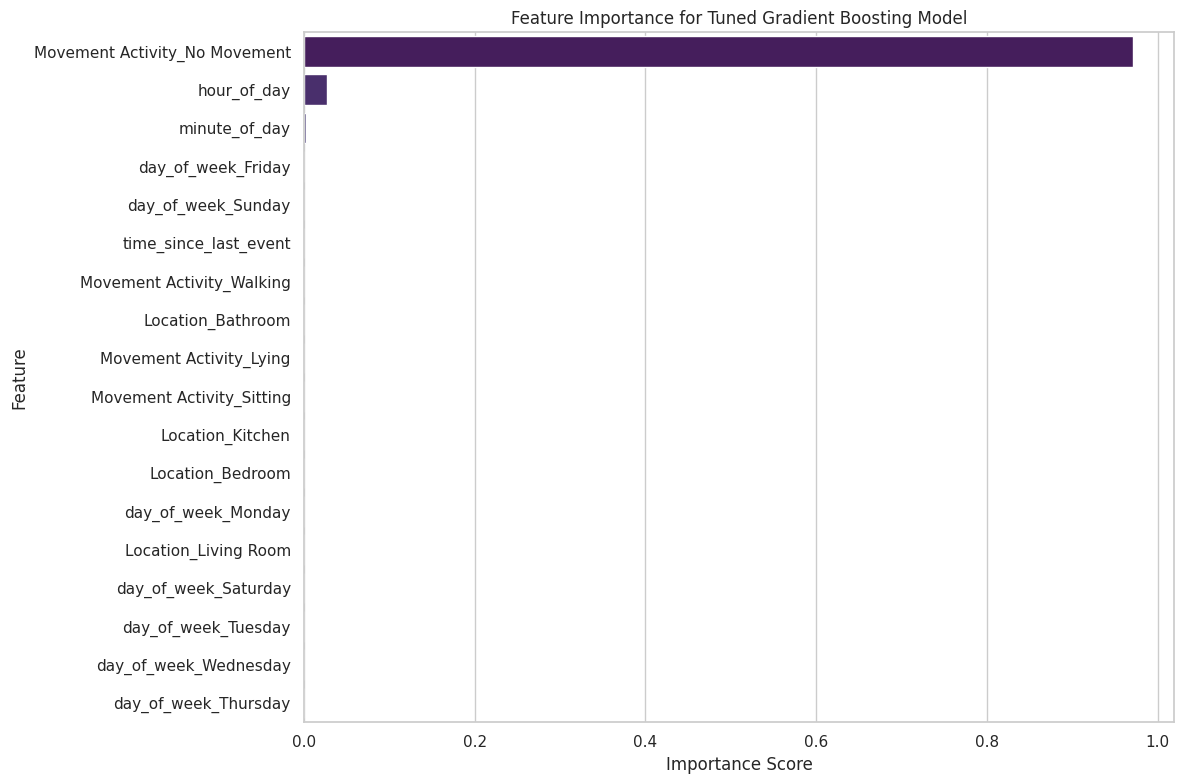


Top 10 most important features:
                          Feature    Importance
4   Movement Activity_No Movement  9.706594e-01
0                     hour_of_day  2.664509e-02
1                   minute_of_day  2.695564e-03
11             day_of_week_Friday  3.099892e-15
14             day_of_week_Sunday  2.134247e-19
2           time_since_last_event  0.000000e+00
6       Movement Activity_Walking  0.000000e+00
7               Location_Bathroom  0.000000e+00
3         Movement Activity_Lying  0.000000e+00
5       Movement Activity_Sitting  0.000000e+00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'best_gb_model' and 'feature_df_resampled' are available from the previous step.
# We also assume 'feature_df' was the original DataFrame before splitting and resampling.

# Feature Importance Visualization
# -----------------------------------------------------------
try:
    # Get the feature importance from the trained model
    feature_importances = best_gb_model.feature_importances_

    # Get the feature names from the DataFrame used for training
    # We use the columns from the processed feature DataFrame to match the model's output
    feature_names = feature_df.columns

    # Create a DataFrame for easy visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importance for Tuned Gradient Boosting Model')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    # Print the top 10 most important features
    print("\nTop 10 most important features:")
    print(importance_df.head(10))

except NameError:
    print("Error: 'best_gb_model' or 'feature_df' not found. Please ensure the previous steps were run correctly.")

Threshold Optimization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'best_gb_model', 'feature_df_test', and 'y_test' are available
# from your previous steps.

# Threshold Adjustment
# -----------------------------------------------------------

# Step 1: Get the raw prediction probabilities from the model
# The [:, 1] gets the probability for the positive class (Fall)
y_pred_proba = best_gb_model.predict_proba(feature_df_test)[:, 1]

# Step 2: Define and apply a new threshold
# Let's try a more conservative threshold of 0.4 to increase recall
new_threshold = 0.4
y_pred_tuned = (y_pred_proba >= new_threshold).astype(int)

# Note: The original 'y_test' is likely a categorical 'No'/'Yes'. We need
# to ensure it's in a numerical format (0/1) for a valid comparison.
y_test_numerical = y_test.astype('category').cat.codes

print(f"\n--- Evaluation with a New Threshold of {new_threshold} ---")

# Print the new confusion matrix
cm_tuned = confusion_matrix(y_test_numerical, y_pred_tuned)
print("Confusion Matrix:")
print(cm_tuned)

# Print the new classification report
print("\nClassification Report:")
target_names = ['No Fall', 'Fall']
print(classification_report(y_test_numerical, y_pred_tuned, target_names=target_names))

# Let's try an even more aggressive threshold
new_threshold_aggressive = 0.3
y_pred_aggressive = (y_pred_proba >= new_threshold_aggressive).astype(int)

print(f"\n--- Evaluation with a New Threshold of {new_threshold_aggressive} ---")
cm_aggressive = confusion_matrix(y_test_numerical, y_pred_aggressive)
print("Confusion Matrix:")
print(cm_aggressive)
print("\nClassification Report:")
print(classification_report(y_test_numerical, y_pred_aggressive, target_names=target_names))

# Default threshold
new_threshold_aggressive = 0.5
y_pred_aggressive = (y_pred_proba >= new_threshold_aggressive).astype(int)

print(f"\n--- Evaluation with Default Threshold of {new_threshold_aggressive} ---")
cm_aggressive = confusion_matrix(y_test_numerical, y_pred_aggressive)
print("Confusion Matrix:")
print(cm_aggressive)
print("\nClassification Report:")
print(classification_report(y_test_numerical, y_pred_aggressive, target_names=target_names))



--- Evaluation with a New Threshold of 0.4 ---
Confusion Matrix:
[[2290  560]
 [   4  146]]

Classification Report:
              precision    recall  f1-score   support

     No Fall       1.00      0.80      0.89      2850
        Fall       0.21      0.97      0.34       150

    accuracy                           0.81      3000
   macro avg       0.60      0.89      0.62      3000
weighted avg       0.96      0.81      0.86      3000


--- Evaluation with a New Threshold of 0.3 ---
Confusion Matrix:
[[   0 2850]
 [   0  150]]

Classification Report:
              precision    recall  f1-score   support

     No Fall       0.00      0.00      0.00      2850
        Fall       0.05      1.00      0.10       150

    accuracy                           0.05      3000
   macro avg       0.03      0.50      0.05      3000
weighted avg       0.00      0.05      0.00      3000


--- Evaluation with Default Threshold of 0.5 ---
Confusion Matrix:
[[2322  528]
 [  12  138]]

Classification R

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Deployment

In [ ]:
import joblib
import os

# Assuming 'best_gb_model', 'scaler', and 'encoder' are available from previous steps.
# The 'new_threshold' of 0.4 should also be stored for later use.
final_threshold = 0.4

# Save the best Gradient Boosting model directly
joblib.dump(best_gb_model, 'fall_detection_model.joblib')
print("Final Gradient Boosting model saved as 'fall_detection_model.joblib'")

# Save the StandardScaler directly
joblib.dump(scaler, 'scaler.joblib')
print("StandardScaler saved as 'scaler.joblib'")

# Save the OneHotEncoder directly
joblib.dump(encoder, 'encoder.joblib')
print("OneHotEncoder saved as 'encoder.joblib'")

# Save the final threshold value for consistent predictions
with open('prediction_threshold.txt', 'w') as f:
    f.write(str(final_threshold))
print("Prediction threshold saved as 'prediction_threshold.txt'")

print("\nAll necessary model artifacts have been saved successfully.")


Final Gradient Boosting model saved as 'fall_detection_model.joblib'
StandardScaler saved as 'scaler.joblib'
OneHotEncoder saved as 'encoder.joblib'
Prediction threshold saved as 'prediction_threshold.txt'

All necessary model artifacts have been saved successfully.


In [ ]:
import joblib


# Assuming 'encoder' and a list of numerical features are available from your training step.
features_to_encode = ['Movement Activity', 'Location', 'day_of_week']
numerical_features = ['hour_of_day', 'minute_of_day', 'time_since_last_event']

# 1. Get the names of the one-hot encoded features
encoded_feature_names = encoder.get_feature_names_out(features_to_encode)

# 2. Combine all feature names into a single list
all_feature_columns = encoded_feature_names.tolist() + numerical_features

# 3. Save the list of feature names to a file
joblib.dump(all_feature_columns, 'feature_names.joblib')
print("Model feature names saved successfully to 'model_feature_names.joblib'")

Model feature names saved successfully to 'model_feature_names.joblib'


In [ ]:
import joblib

# Replace with your actual filename
filename = "feature_names.joblib"

# Load the joblib file
loaded_obj = joblib.load(filename)

# Print the contents
print(type(loaded_obj))
print("Feature names")
print(loaded_obj)

scaler = joblib.load("scaler.joblib")
print("Scaler names")
print(scaler.feature_names_in_)  # This shows feature names scaler was trained on

encoder = joblib.load("encoder.joblib")
print("Encoder names")
print(encoder.categories_)  # This is a list of arrays of categories per feature

model = joblib.load("fall_detection_model.joblib")
print("Model names")
print(model.feature_names_in_)


<class 'list'>
Feature names
['Movement Activity_Lying', 'Movement Activity_No Movement', 'Movement Activity_Sitting', 'Movement Activity_Walking', 'Location_Bathroom', 'Location_Bedroom', 'Location_Kitchen', 'Location_Living Room', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'hour_of_day', 'minute_of_day', 'time_since_last_event']
Scaler names
['hour_of_day' 'minute_of_day' 'time_since_last_event'
 'Movement Activity_Lying' 'Movement Activity_No Movement'
 'Movement Activity_Sitting' 'Movement Activity_Walking'
 'Location_Bathroom' 'Location_Bedroom' 'Location_Kitchen'
 'Location_Living Room' 'day_of_week_Friday' 'day_of_week_Monday'
 'day_of_week_Saturday' 'day_of_week_Sunday' 'day_of_week_Thursday'
 'day_of_week_Tuesday' 'day_of_week_Wednesday']
Encoder names
[array(['Lying', 'No Movement', 'Sitting', 'Walking'], dtype=object), array(['Bathroom', 'Bedroom', 'Kitchen'